In [22]:
#Ví Dụ 1
import numpy as np
import matplotlib.pyplot as plt
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

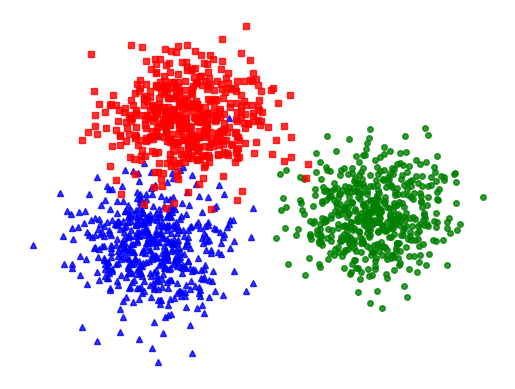

In [23]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

display(X[1:, :], original_label)

In [24]:
from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# Y = convert_labels(y, C)

In [25]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
# stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

In [26]:
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)
# W[-1] is the solution, W is all history of weights

In [27]:
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.23379509 -4.77174898 -4.95020147]
 [-0.78223087  1.78659578 -0.44869   ]
 [-1.97950377 -2.24889823  0.89240269]]


In [28]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)
Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)

(1, 270400)
(3, 270400)


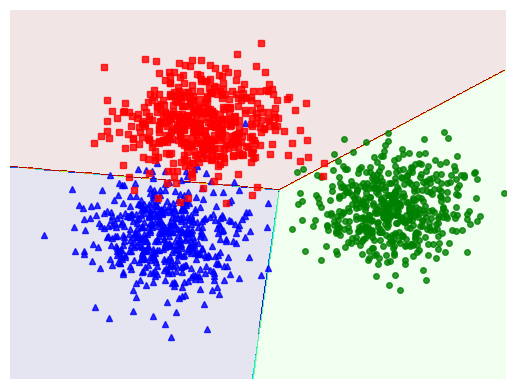

<Figure size 640x480 with 0 Axes>

In [29]:
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

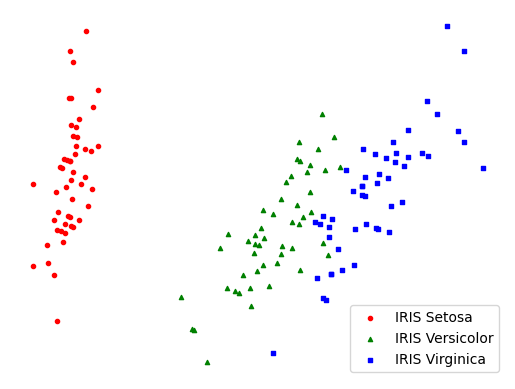

In [30]:
#Ví Dụ 2
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
#print(Y.shape)
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',c='blue', marker="s")

plt.legend()
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris=load_iris()
# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)
#print(X.shape)
#print(Y)
# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)

#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg= LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,Y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(lorg.coef_)

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
[[-0.13615072  1.082325   -2.31501373 -0.99544209]
 [ 0.33413156 -0.38484384 -0.12226323 -0.92911964]
 [-0.19798084 -0.69748117  2.43727696  1.92456173]]


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle= False )
#print(X_train.shape)

In [33]:
model = LogisticRegression(multi_class='multinomial', solver ='lbfgs')
score = cross_val_score(model, X_train, Y_train,scoring='accuracy', n_jobs=-1 )
print('Mean Accuracy: %.3f (%.3f)' % (mean(score), std(score)))

Mean Accuracy: 0.983 (0.020)


In [34]:
#Ví Dụ 3
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups_vectorized

In [35]:
n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,

stratify=y, test_size=0.1)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [36]:
lorg.fit(X_train,y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
print(cm)
print(lorg.coef_)

0.823342175066313
[[68  0  0  0  0  0  0  0  0  1  0  1  0  1  0  4  0  2  0  3]
 [ 0 79  3  1  0  5  2  0  0  0  0  1  1  1  1  1  0  1  0  1]
 [ 0  5 78  6  1  4  2  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  4  8 67  4  1  4  1  1  0  0  1  3  2  0  0  0  1  1  0]
 [ 0  3  2  8 74  1  2  0  0  0  0  0  3  0  0  1  1  1  0  0]
 [ 0  4  7  3  1 81  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2 82  4  0  1  1  1  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2 92  0  0  0  0  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  6 86  1  0  0  0  1  1  0  0  0  1  0]
 [ 0  1  0  1  0  1  2  0  0 87  4  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  3 92  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  1  1  4  2  0  1  2  1 82  0  0  0  0  2  1  0  0]
 [ 0  4  0  1  1  1  2  4  0  0  0  0 84  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  3  2  1  0  1  1 80  3  1  0  2  1  0]
 [ 1  1  0  0  1  2  2  0  0  0  0  0  0  3 88  1  0  0  0  0]
 [ 2  3  0  0  1  3  0  0  0  0  1  0

In [37]:
#Ví Dụ 4
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# change file_data to where did you put it!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
file_data = 'C:\\Python\\Học Máy\\glass.csv'
glass_df = pd.read_csv(file_data)
print(glass_df.info())
glass_types = glass_df['Type'].unique()
print(glass_types)
print(glass_df['Type'].value_counts())
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,test_size=0.25,random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None
[1 2 3 5 6 7]
2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [38]:
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
print(cm)
print(lorg.coef_)

1.0
[[14  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
[[-0.75189154  0.02491292  0.17793233  0.05799658 -0.06745797  1.09443343
  -0.04368814  0.38986417  0.00894652 -0.0049835 ]
 [-0.29261732  0.0136997   0.09896275  0.03442945  0.15216758  0.73745161
   0.11457587 -0.2063107  -0.01068165  0.05057545]
 [ 0.02011216  0.00277987  0.16064216  0.53792643 -0.26973391  0.06706261
  -0.13484211 -0.0698532  -0.1326334  -0.02433734]
 [ 0.14086637  0.00352044 -0.42158543 -0.50938976  0.3809793  -0.12955105
   0.40677157  0.26990611  0.18598849  0.02274038]
 [ 0.28944084 -0.01966821  0.18257247 -0.08798482 -0.23322359 -0.55320636
  -0.33345357 -0.00768151 -0.19528421 -0.04054136]
 [ 0.59408951 -0.02524471 -0.19852428 -0.03297787  0.03726859 -1.21619025
  -0.00936362 -0.37592486  0.14366425 -0.00345363]]


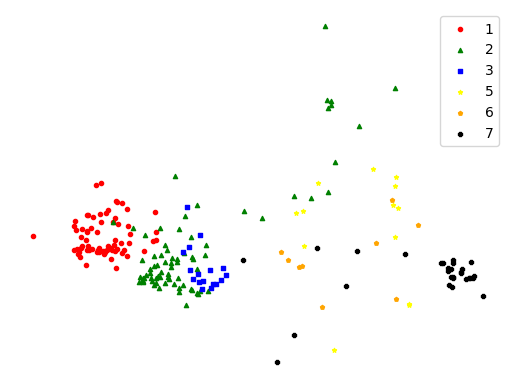

Accuracy: 100.00%
[[14  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
[[-0.75194017  0.02492515  0.17817036  0.0581206  -0.06763857  1.09450705
  -0.04382693  0.39045526  0.00877432 -0.00500995]
 [-0.29275337  0.01369806  0.0984639   0.03490389  0.15258755  0.73795249
   0.11503027 -0.20770339 -0.01050861  0.05076633]
 [ 0.02012219  0.0027835   0.16007875  0.53880338 -0.26997211  0.06711716
  -0.13483879 -0.06979936 -0.13277095 -0.02437584]
 [ 0.14087501  0.00352854 -0.42196315 -0.50974978  0.38130721 -0.12953871
   0.40693493  0.27022591  0.18632895  0.02274869]
 [ 0.28944552 -0.0196737   0.18341259 -0.08862304 -0.23347157 -0.5533694
  -0.33371769 -0.00745359 -0.19532282 -0.04060356]
 [ 0.59425082 -0.02526154 -0.19816245 -0.03345506  0.03718749 -1.21666859
  -0.00958179 -0.37572482  0.1434991  -0.00352567]]


In [39]:
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,test_size=0.25,random_state=42)

X_norm = (X_1 - X_1.min())/(X_1.max() - X_1.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[y_1==1][0], transformed[y_1==1][1], s=9, label='1', c='red')
plt.scatter(transformed[y_1==2][0], transformed[y_1==2][1], s=9, label='2', c='green', marker="^")
plt.scatter(transformed[y_1==3][0], transformed[y_1==3][1], s=9, label='3', c='blue', marker="s")
plt.scatter(transformed[y_1==5][0], transformed[y_1==5][1], s=9, label='5', c='yellow', marker="*")
plt.scatter(transformed[y_1==6][0], transformed[y_1==6][1], s=9, label='6', c='orange', marker="p")
plt.scatter(transformed[y_1==7][0], transformed[y_1==7][1], s=9, label='7', c='black', marker="P")
plt.legend()
plt.show()

LogReg = LogisticRegression(multi_class="multinomial", solver="sag", max_iter=5000)
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)

print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred))
print(LogReg.coef_)

In [40]:
#Ví Dụ 5
import os
import numpy as np
# set names to the paths because they're too long
data_path = 'C:\\Python\\Học Máy'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [41]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [42]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [43]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)
# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [44]:
def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta
    d, N = X.shape
    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta, losses

6 4


<Figure size 640x480 with 0 Axes>

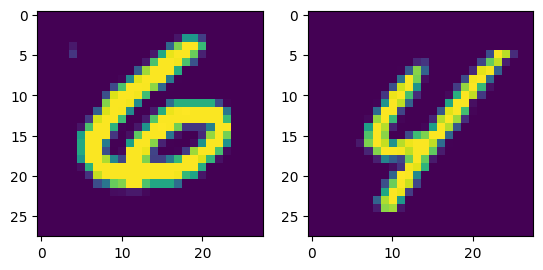

In [45]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I havestacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

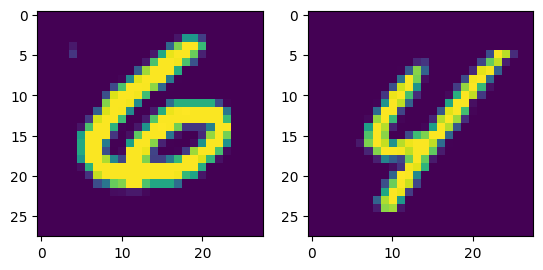

In [46]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),
axis = 0)

Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I havestacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [47]:
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.7933978644280316
epoch 1 - cost 0.7838192040279826
epoch 2 - cost 0.7804491205093856
epoch 3 - cost 0.7802082158695858
epoch 4 - cost 0.7819073648300938
epoch 5 - cost 0.7760467774788478
epoch 6 - cost 0.7806517282413918
epoch 7 - cost 0.776700469344711
epoch 8 - cost 0.7758020549035199
epoch 9 - cost 0.7773891097110722
epoch 10 - cost 0.7762090549614191
epoch 11 - cost 0.7775863997276994
epoch 12 - cost 0.7771976193832952
epoch 13 - cost 0.7760157581022591
epoch 14 - cost 0.7779326278588817
epoch 15 - cost 0.7752379430671718
epoch 16 - cost 0.7745913470951808
epoch 17 - cost 0.7742498132776051
epoch 18 - cost 0.7733439401744715
epoch 19 - cost 0.7744189853580732
training success:  (785, 10) 500


In [48]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels,
pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),
axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels,
                                                pred(opt_theta, X_test)))


accuracy training data:  0.9354
(785, 10000)
accuracy testing data:  0.8594
